In [24]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import pandas as pd

PIC paper: https://www.cs.cmu.edu/~frank/papers/icml2010-pic-final.pdf \
Normalized cuts paper: https://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf \
Random walks paper: http://proceedings.mlr.press/r3/meila01a.html

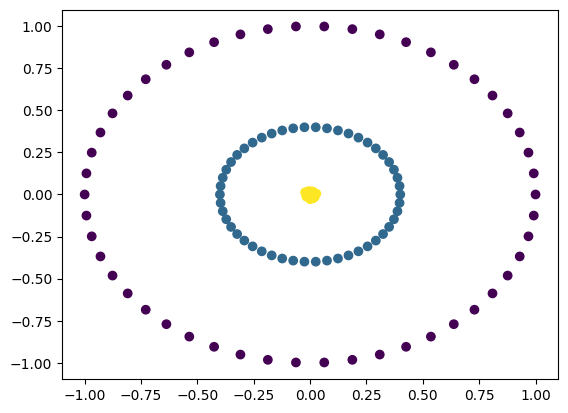

In [23]:
# create bullseye dataset
X, y = make_circles(factor=0.4)
X = np.vstack((X, np.random.normal(scale=0.01, size=(50, 2))))
y = np.hstack((y, np.full(50, 3)))
# plot data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

(0.06001912596462914, 0.09279801629178772)

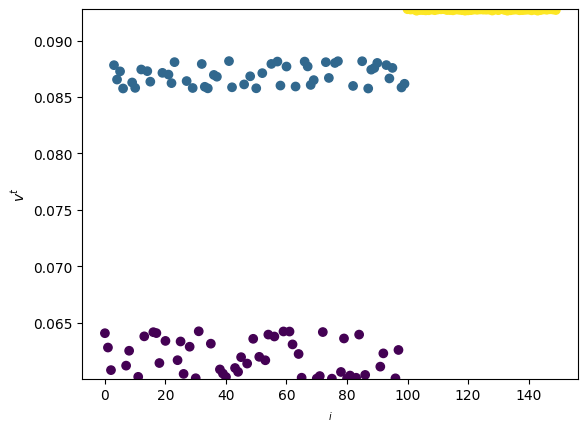

In [34]:
# attempt to recreate example in Figure 1 of PIC paper

A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))
D = np.diag(A.sum(axis=1)) # axis=1 means sum within row
W = A @ np.linalg.inv(D)

t_max = 1000

vs = []
v_t = np.random.rand(W.shape[1])

vs.append(v_t)
for t in range(t_max):
    v_t = W @ v_t
    v_t = v_t / norm(v_t)
    vs.append(v_t)

t_sel = 1 # select which iteration to plot
plt.scatter(x=range(len(vs[t_sel])), y=vs[t_sel], c=y)
plt.xlabel('$_i$')
plt.ylabel('$v^t$')
ax = plt.gca()
ax.set_ylim([min(vs[t_sel]), max(vs[t_sel])]) # scale y axis to go from min to max

(0.06001912596462914, 0.09279801629178772)

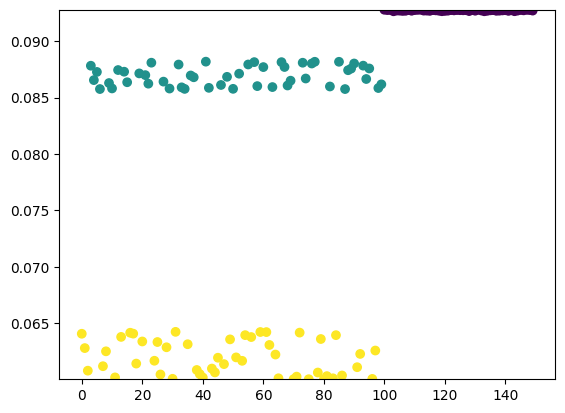

In [36]:
# Clustering the data on vt with KMeans and then plotting

vt_long = vs[t_sel].reshape(-1, 1)
km = KMeans(n_clusters=3, init='random')
y_hat = km.fit_predict(vt_long)

plt.scatter(x=range(len(vs[t_sel])), y=vs[t_sel], c=y_hat)
ax = plt.gca()
ax.set_ylim([min(vs[t_sel]), max(vs[t_sel])])

In [37]:
# Load iris data
iris_data = load_iris(as_frame=True)
X = iris_data.data
y = iris_data.target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


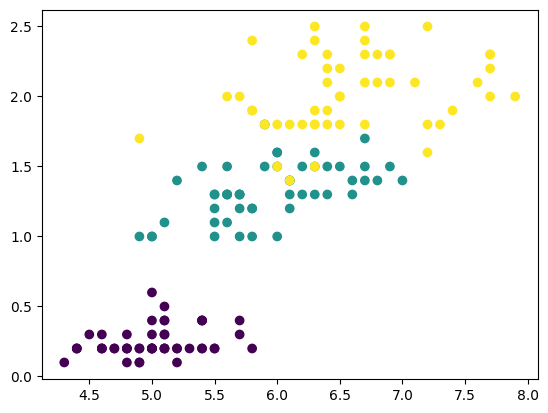

In [38]:
plt.scatter(x=X['sepal length (cm)'], y=X['petal width (cm)'], c=y)
X

Completed 285 iterations


(0.023061105311011226, 0.11077103608061288)

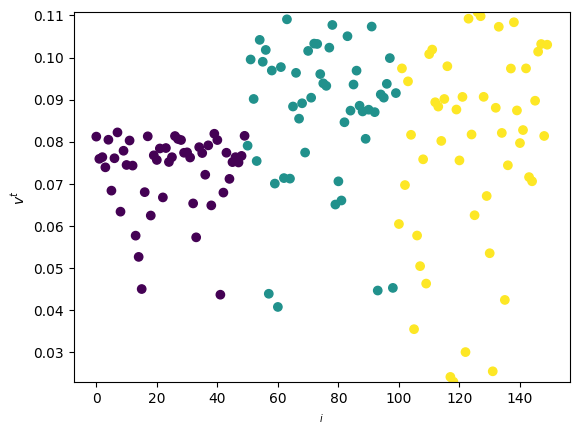

In [46]:
# Attempt at implementing Algorithm 1 from PIC clustering on the iris dataset

A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))
D = np.diag(A.sum(axis=1)) # axis=1 means sum within row
W = np.linalg.inv(D) @ A

vs = []
v_t = np.random.rand(W.shape[1])
vs.append(v_t)

ds = []
d_0 = v_t
ds.append(d_0)

# do power iteration while rate of converge is greater than threshold
while (len(ds) < 2) or (norm(ds[-1] - ds[-2]) > (1e-5/W.shape[1])):
    v_t = v_t @ W
    v_t = v_t / norm(v_t)
    vs.append(v_t)
    ds.append(vs[-1] - vs[-2])

# set t_sel to tmax
t_sel = len(vs) -1

print(f"Completed {t_sel} iterations")
plt.scatter(x=range(len(vs[t_sel])), y=vs[t_sel], c=y)
plt.xlabel('$_i$')
plt.ylabel('$v^t$')
ax = plt.gca()
ax.set_ylim([min(vs[t_sel]), max(vs[t_sel])])